# CNMF-E (PART 2)

---

### **Please start with "MotionCorrect" as this will provide you with parameter setting operations and motion correction**

## IMPORTANT: Please stop your "MotionCorrection.ipynb" kernel by hitting the "Restart" button on that tab before moving forward

---

This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

![cnmfe pipeline full](https://raw.githubusercontent.com/EricThomson/image_sandbox/main/images/full_cnmfe_workflow.jpg)

1. Apply the NoRMCorre (nonrigid motion correction) algorithm for motion correction.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates, and narrow down to the final set of estimates.

Some tools for visualization of movies and results are also included. 

> This demo follows a similar pattern to the CNMF demo in `demo_pipeline.ipynb`. It includes less explanation except where there are important differences. If you want to get a more explanation-heavy picture of the fundamentals, we suggest starting with `demo_pipeline.ipynb`.

### It is recommended to run cells separately, depending on what you want to do, rather than running them in sequential order. They do not have to all be run

# Imports and general setup

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
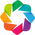

In [2]:
import bokeh.plotting as bpl
import cv2
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        # get_ipython().run_line_magic('matplotlib', 'qt')  #uncomment to run in qt mode
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass

bpl.output_notebook()
hv.notebook_extension('bokeh')

from pynwb import NWBHDF5IO

import tifffile
from ipywidgets import IntSlider, VBox
import fastplotlib as fpl

from caiman.motion_correction import high_pass_filter_space
from caiman.summary_images import correlation_pnr


Set up logger and environment variables

In [3]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables in case they weren't already set
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

# Reload motion corrected data to process

In [4]:
# loading memory mapped file
dir = input("Enter the directory containing the memmap and hdf5 files")
dir_content = os.listdir(dir)

# get all motion correction files
mot_cor_files = [i for i in dir_content if 'motioncor' in i]
if len(mot_cor_files)>1:
    print("Multiple motion correction files detected. Please choose a file.",mot_cor_files)
    mot_cor_file = input("Please see the print below this cell, copy which motion corrected file to use and paste above")
else:
    mot_cor_file = mot_cor_files[0]

# only one cnmfe file should be saved out - this can be fixed later
cnmfe_file = [i for i in dir_content if '.hdf5' in i][0]

# get paths
mot_dir = os.path.join(dir,mot_cor_file)
cnmfe_dir = os.path.join(dir,cnmfe_file)

# load memory mapped file
print("Loading memory mapped file")
Yr, dims, T = cm.load_memmap(mot_dir)
images = Yr.T.reshape((T,) + dims, order='F')

Loading memory mapped file
Loading CNMFE model...


NameError: name 'num_processors_to_use' is not defined

#### Plot an example snippet of your data

In [6]:
images.shape

(3687, 200, 200)

Text(0.5, 0, 'Samples (time)')

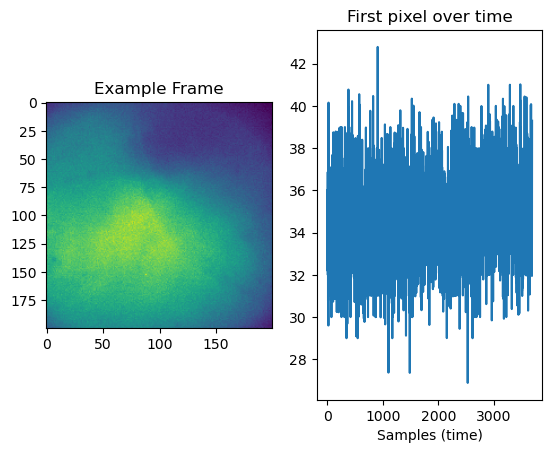

In [5]:
plt.subplot(1,2,1)
plt.imshow(images[0,:,:])
plt.title("Example Frame")

plt.subplot(1,2,2)
plt.plot(images[:,0,0])
plt.title("First pixel over time")
plt.xlabel("Samples (time)")

# Fit CNMFE model

The 'init_params' dictionary is what you care about in the parameters object below

In [13]:
cnmfe_model.params

CNMFParams:

data:

{'caiman_version': '1.9.16',
 'decay_time': 0.4,
 'dims': (200, 200),
 'dxy': (1, 1),
 'fnames': array([b'/Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2024_01_23/14_04_52/miniscopeDeviceName/full_movie_mod_downx2.tif'],
      dtype='|S118'),
 'fr': 30,
 'last_commit': 'GITW-6cef562fb12c91e9d895b84418ee3a5d508a5d7b',
 'mmap_C': None,
 'mmap_F': None,
 'var_name_hdf5': 'mov'}

spatial_params:

{'block_size_spat': 5000,
 'dist': 3,
 'expandCore': array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]]),
 'extract_cc': True,
 'maxthr': 0.1,
 'medw': b'NoneType',
 'method_exp': 'dilate',
 'method_ls': 'lasso_lars',
 'n_pixels_per_process': None,
 'nb': 0,
 'normalize_yyt_one': True,
 'nrgthr': 0.9999,
 'num_blocks_per_run_spat': 20,
 'se': None,
 'ss': None,
 'thr_method': 'nrg',
 'update_background_components': True}

temporal_params:

{'ITER': 2,
 'bas_nonneg': False,
 'block_size_temp': 5000,
 'fu

# Reset parallel processing

SOMETHING IS WRONG HERE. It is detecting multiprocessing. Lets look at old version to get local working

In [8]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")


You have 12 CPUs available in your current environment
Setting up new cluster
Successfully set up cluster with 11 processes


In [9]:
# loading cnmfe model
print("Loading CNMFE model...")
cnmfe_model = load_CNMF(cnmfe_dir, n_processes=n_processes, dview=cluster)
print(cnmfe_model)

# fit CNMFE model
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=cluster, 
                        params=cnmfe_model.params)

print("Fitting CNMFE model...")
cnmfe_model.fit(images)

# resave
save_path =  os.path.join(dir,r'cnmfe_fit.hdf5')  # or add full/path/to/file.hdf5
cnmfe_model.save(save_path)

Loading CNMFE model...
Fitting CNMFE model...


RuntimeError: sequence argument must have length equal to input rank

In [11]:
cluster

<multiprocessing.pool.Pool state=RUN pool_size=11>